<a href="https://colab.research.google.com/github/EikEUFS/Mestrado-BO-Atividade01/blob/master/BO_Atividade_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from random import randrange, sample, uniform
from past.builtins import xrange
import matplotlib.pyplot as plt
import numpy as np

def create_random_vector(n_X, min_X, max_X):
  X = []
  count = 0;

  while (count < n_X):
    value_random = uniform(min_X,max_X)
    X.append(value_random)
    count += 1
  
  return X

In [2]:
O_F1 = [
        -65, -2, -21, 86, 65, -27, -91, 7, 86, 49, -58, 96, -77, 10, 86, -78, 48, 13, -28, 63, 95, -58, -96, 
        7, -21, -100, 42, 8, -67, 56, -99, 18, 34, -67, -46, -14, 78, -98, 34, 29, -47, 16, 62, 26, -20,-94,
        -7, 87, -32, -7, 43, -36, -90, 95, 84, 60, 98, 0, 82, -21, 9, -84, 57, -61, 50, 84, 64, -82, -24, -85,
        -80, 82, -63, -94, 19, -43, -100, -62, 3, -34, -83, 12, -68, -43, 95, -68, -8, 69, 89, -37, 64, -35,
        -59, -83, -67, -93, 28, -76, -26, -65
        ]

In [3]:
def tweak_1(S, p, r, min_P, max_P):
  count = 0;
  length = len(S)
  
  while(count < length):
    random_p = uniform(0,1)
    if ( p >= random_p):
      find = True;
      while(find):
        random_r = uniform(-r,r)
        find = min_P >= S[count] + random_r and max_P <= S[count] + random_r
      S[count] = S[count] + random_r
    count += 1
  
  return S 

def tweak_2(S, min_X, max_X):
  index_random = randrange(len(S) - 1)
  value_random = uniform(min_X,max_X)

  S[index_random] = value_random

  return S

def shifted_sphere(RS, O, fbias):
  count = 0
  sum = 0
  length = len(RS)

  while(count < length):
    sum += (RS[count] - O[count]) * (RS[count] - O[count])
    count += 1
    
  return sum + fbias

def hill_climbing(X, O, p, r, n = 5000,fbias = -450, min_X = -100, max_X = 100):  
  c_1 = 0  
  q_1 = False
  cq_1 = []
  vq_R_1 = 0
  vq_S_1 = 0
  S_1 = X

  c_2 = 0  
  q_2 = False
  cq_2 = []
  vq_R_2 = 0
  vq_S_2 = 0
  S_2 = X

  for _ in xrange(n):   
    R_1 = tweak_1(S_1, p, r, min_X, max_X)    # Ajuste 1    

    if not q_1:                               # Se nao tiver armazenado
      vq_S_1 = shifted_sphere(S_1, O, fbias)  # Armazene a qualidade S
      q_1 = True     
      
    vq_R_1 = shifted_sphere(R_1, O, fbias)    # Armazene a qualidade R 1    

    if (vq_R_1 <= vq_S_1):                    # SE Q(R) < Q(S)
      S_1 = R_1                               #   S = R     
      q_1 = False                             #   desmarca que esta armazenado
      cq_1.append(vq_R_1)                     #   armazena o custo do R
    else :                                    # SENAO
      cq_1.append(vq_S_1)                     #   armazena o custo do S

    R_2 = tweak_2(S_2, min_X, max_X)

    if not q_2:
      vq_S_2 = shifted_sphere(S_2, O, fbias)
      q_2 = True

    vq_R_2 = shifted_sphere(R_2, O, fbias)

    if (vq_R_2 <= vq_S_2):
      S_2 = R_2
      q_2 = False
      cq_2.append(vq_R_2)
    else :
      cq_2.append(vq_S_2)

  return S_1, S_2, cq_1, cq_2

In [4]:
if __name__ == '__main__':
  n_X = 100                               # Tamanho do Vetor
  min_X = -100                            # Valor Minimo do Vetor
  max_X = 100                             # Valor Maximo do Vetor
  n = 50000                               # Repeticao
  p = 0.6                                 # Probabilidade de adicionar no
  r = 8                                   # Ruido
  fbias = -450                            # BIAS

  X = create_random_vector(n_X, min_X, max_X)
  O = O_F1

  S_1, S_2, cq_1, cq_2 = hill_climbing(X, O, p, r, n, fbias, min_X, max_X) 

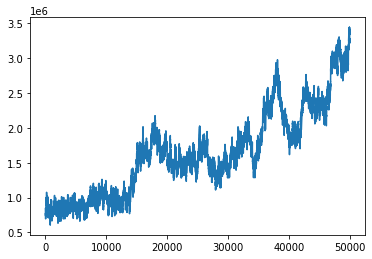

In [5]:
plt.plot(cq_1)
plt.show()

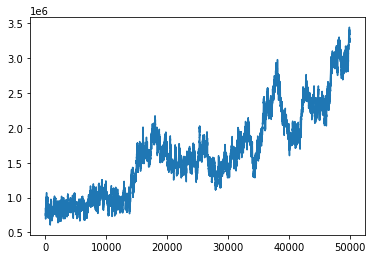

In [6]:
plt.plot(cq_2)
plt.show()